# Covid-19 Outcome prediction

#### In this project multiple classifiers are required to predict t the outcome (death/recovered) when a new person is admitted to the hospital. The data is already cleaned and preprocessed.
### steps in this notebook:
1. Reading and visualizing data.
2. Build K-Nearest Neighbors classifier.
3. Build Logistic Regression classifier.
4. Build Naïve Bayes classifier.
5. Build Decision Trees classifier.
6. Build Support Vector Machines classifier.

# 1. Reading and visualizing data

## 1.1 import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score
from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport
from sklearn import tree
#sklearn packages required to build our models
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## 1.2 reading data and some visualizations

In [2]:
df= pd.read_csv("data.csv")

In [3]:
df.shape

(863, 15)

In [4]:
df.head()

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    863 non-null    int64  
 1   location      863 non-null    int64  
 2   country       863 non-null    int64  
 3   gender        863 non-null    int64  
 4   age           863 non-null    float64
 5   vis_wuhan     863 non-null    int64  
 6   from_wuhan    863 non-null    int64  
 7   symptom1      863 non-null    int64  
 8   symptom2      863 non-null    int64  
 9   symptom3      863 non-null    int64  
 10  symptom4      863 non-null    int64  
 11  symptom5      863 non-null    int64  
 12  symptom6      863 non-null    int64  
 13  diff_sym_hos  863 non-null    int64  
 14  result        863 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 101.3 KB


In [6]:
df.describe()

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,431.000000,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,249.270937,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,215.500000,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,431.000000,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,646.500000,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,862.000000,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


In [7]:
df.drop(["Unnamed: 0"],1,inplace=True)


C:\Users\W1021H~1\AppData\Local\Temp/ipykernel_13032/145038874.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(["Unnamed: 0"],1,inplace=True)


In [8]:
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [9]:
df.tail()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
858,48,3,2,24.0,0,0,14,31,19,12,3,1,0,1
859,0,0,2,35.0,0,0,14,31,19,12,3,1,0,0
860,3,1,1,49.4,0,0,14,31,19,12,3,1,0,0
861,24,9,1,49.4,0,0,14,31,19,12,3,1,0,0
862,15,27,1,70.0,0,0,14,31,19,12,3,1,0,0


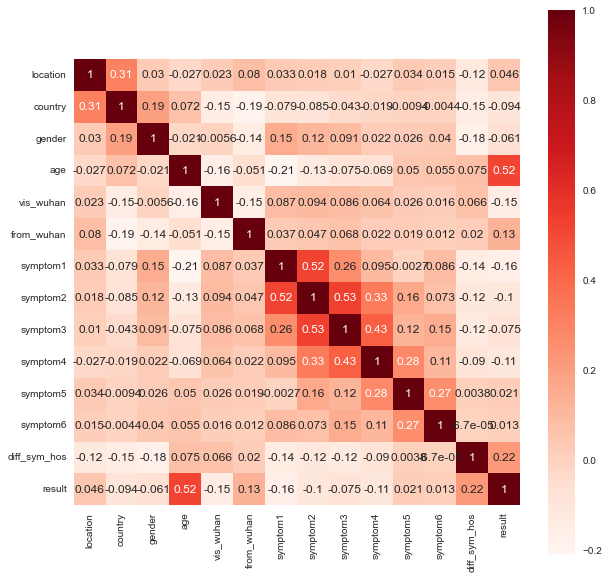

In [10]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True,cmap=plt.cm.Reds, square=True)
plt.yticks(rotation=0)
plt.show()

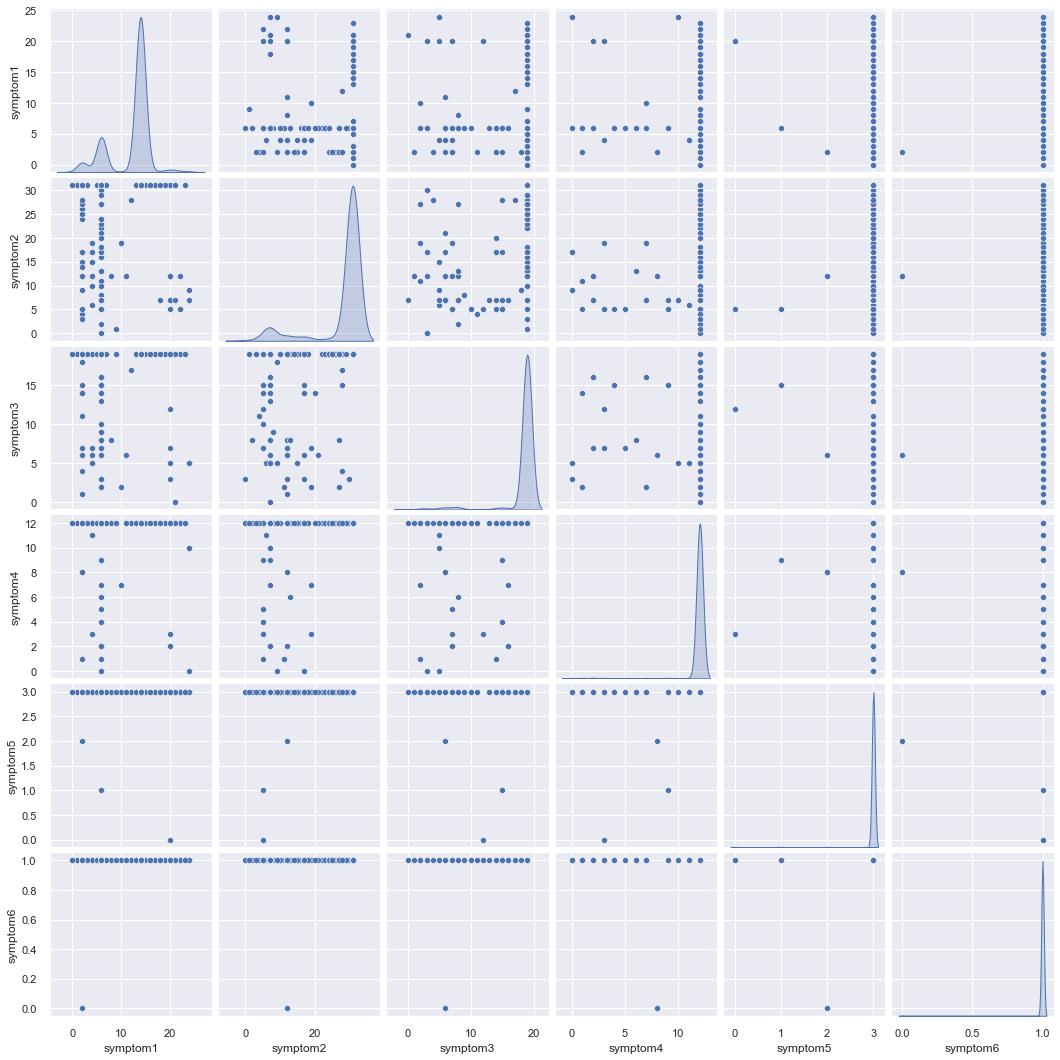

In [11]:
sns.set(rc={'figure.figsize':(12,9)})
cData_attr = df.iloc[:, 6:12]
sns.pairplot(cData_attr, diag_kind='kde')   

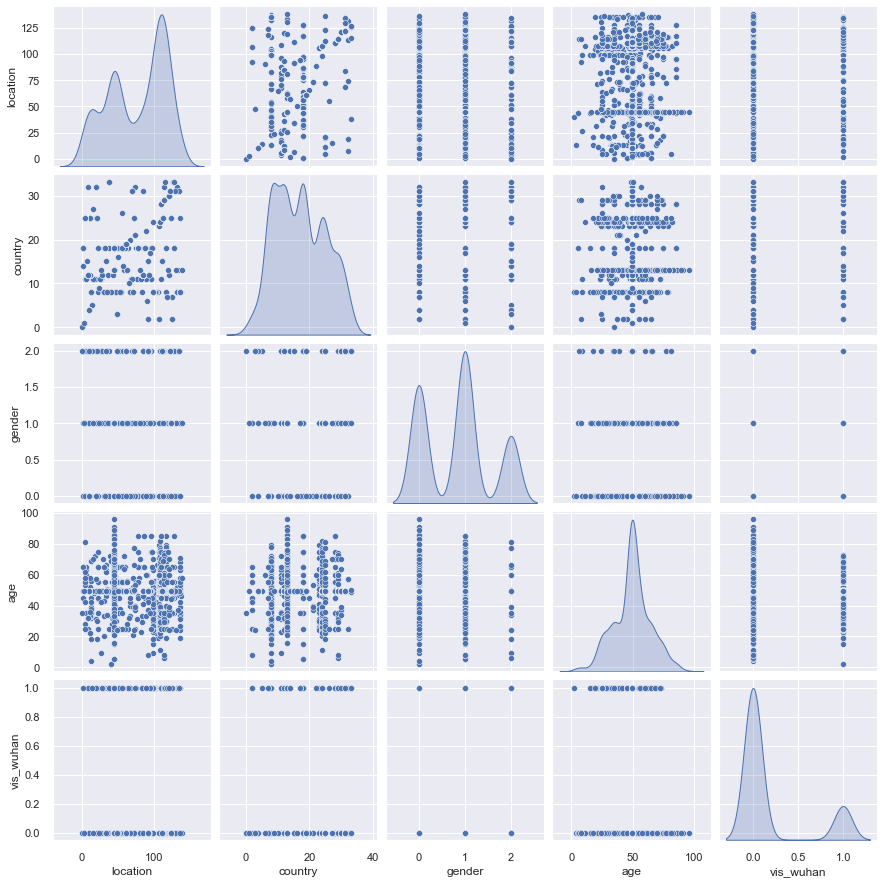

In [12]:
sns.set(rc={'figure.figsize':(12,9)})
cData_attr = df.iloc[:, 0:5]
sns.pairplot(cData_attr, diag_kind='kde') 

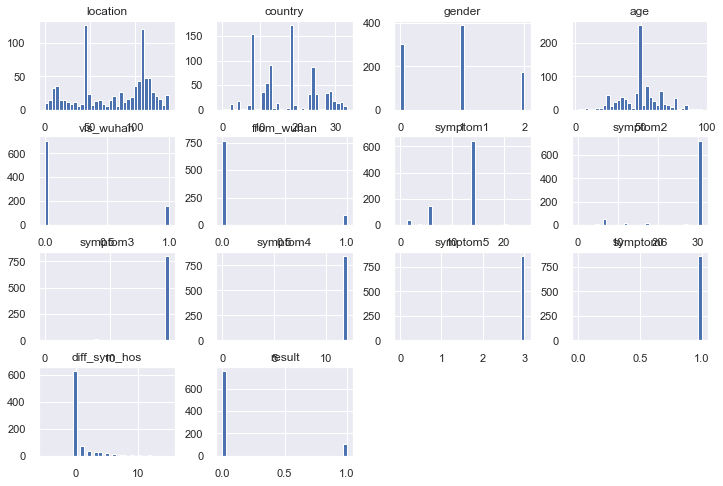

In [13]:
#to see the distribution of features
df.hist(figsize=(12,8),bins=35)
plt.show()

## 1.3 spliting data into train and test 

In [14]:
x=df.iloc[ : , :-1]
y=df['result']

In [15]:
x

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,48,3,2,24.0,0,0,14,31,19,12,3,1,0
859,0,0,2,35.0,0,0,14,31,19,12,3,1,0
860,3,1,1,49.4,0,0,14,31,19,12,3,1,0
861,24,9,1,49.4,0,0,14,31,19,12,3,1,0


In [16]:
y

0      1
1      0
2      0
3      0
4      0
      ..
858    1
859    0
860    0
861    0
862    0
Name: result, Length: 863, dtype: int64

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 123, shuffle = True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(604, 13)
(259, 13)
(604,)
(259,)


## 1.4 normalizing data

In [18]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [19]:
x_train

array([[ 9.31871907e-01,  1.52590240e+00,  1.57823535e+00, ...,
         5.15368072e-02,  4.07231481e-02, -4.08601808e-01],
       [ 7.26405101e-01,  7.59992385e-01,  2.08617316e-01, ...,
         5.15368072e-02,  4.07231481e-02,  4.14049832e-01],
       [-8.40279295e-01, -5.16524302e-01,  2.08617316e-01, ...,
         5.15368072e-02,  4.07231481e-02,  2.72401206e-03],
       ...,
       [ 7.26405101e-01,  7.59992385e-01,  2.08617316e-01, ...,
         5.15368072e-02,  4.07231481e-02,  3.29333057e+00],
       [-1.21145474e-01,  5.04689047e-01, -1.16100072e+00, ...,
         5.15368072e-02,  4.07231481e-02, -4.08601808e-01],
       [ 8.29138504e-01,  1.39825073e+00,  2.08617316e-01, ...,
         5.15368072e-02,  4.07231481e-02, -4.08601808e-01]])

## steps in building our models:
1. build the model with GridSearchCV to find optimal hyperparameters.
2. fit the model with best hyperparameters.
3. compare the performance of all classifiers using different metrics such as the precision, recall, F1-score, and ROC/AUC curves.
4. calculating classification report.
5. confusion matrix, roc-auc, classification report visualization. 

# 2. K-Nearest Neighbors

In [20]:
#using GridSearchCV to find optimal hyperparameters in KNN.
initial_neighbors = np.random.randint(1 , 15)
clf = KNeighborsClassifier(n_neighbors = initial_neighbors)
k_list = list(range(1, 15))
param = {'n_neighbors': k_list, 'weights': ['uniform', 'distance']}
gridsearch = GridSearchCV(clf, param, cv=5, scoring='accuracy')
gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=7),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [21]:
print(gridsearch.best_estimator_)
print(gridsearch.best_score_)

KNeighborsClassifier(n_neighbors=4, weights='distance')
0.9271763085399449


In [22]:
#Fitting the model with the optimal hyperparameters.
best_knn = KNeighborsClassifier(n_neighbors = 4, weights='distance')
best_knn.fit(x_train, y_train)
print('Best KNN Model Train Score is : ' , best_knn.score(x_train, y_train))

Best KNN Model Train Score is :  1.0


In [23]:
#compare the performance of all classifiers using different metrics such as the precision, recall, F1-score, and ROC/AUC curves
y_pred_knn = best_knn.predict(x_test)
CM = confusion_matrix(y_test, y_pred_knn) # calculating confusion matrix
print('confusion matrix for KNN is:', CM)
accuracy= accuracy_score(y_test, y_pred_knn) # calculating accuracy score
print('accuracy score for KNN is:', accuracy)
precision= precision_score(y_test, y_pred_knn) # calculating precision score
print('precision score for KNN is:', precision)
recall= recall_score(y_test, y_pred_knn) # calculating recall score
print('recall score for KNN is:', recall)
f1= f1_score(y_test,y_pred_knn)
print('F1 score for KNN is:', f1)
roc_auc = roc_auc_score(y_test,best_knn.predict_proba(x_test)[:,1]) #calculating roc-auc score
print('roc_auc score for KNN is:', roc_auc)

confusion matrix for KNN is: [[227   4]
 [  8  20]]
accuracy score for KNN is: 0.9536679536679536
precision score for KNN is: 0.8333333333333334
recall score for KNN is: 0.7142857142857143
F1 score for KNN is: 0.7692307692307692
roc_auc score for KNN is: 0.9039888682745826


In [24]:
# calculating classification report. 
classes = ['0' , '1']
report=classification_report(y_test, y_pred_knn, target_names=classes)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       231
           1       0.83      0.71      0.77        28

    accuracy                           0.95       259
   macro avg       0.90      0.85      0.87       259
weighted avg       0.95      0.95      0.95       259



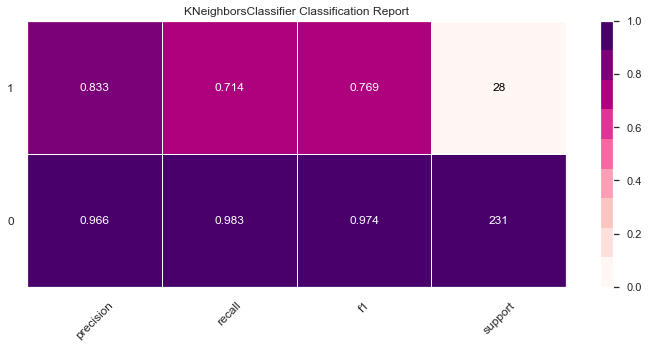

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [25]:
#plotting classification report.
plt.figure(figsize=(10,5))
report_graph = ClassificationReport(best_knn, classes=classes, support=True,cmap='RdPu')
report_graph.fit(x_train, y_train)        
report_graph.score(x_test, y_test)        
report_graph.show()

Text(18.0, 0.5, 'Actual')

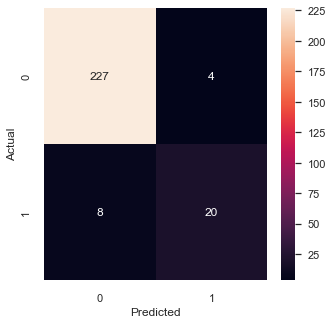

In [26]:
# plotting confusion matrix.
plt.figure(figsize=(5,5))
sns.heatmap(CM, annot=True, fmt='g');
plt.xlabel('Predicted')
plt.ylabel('Actual')


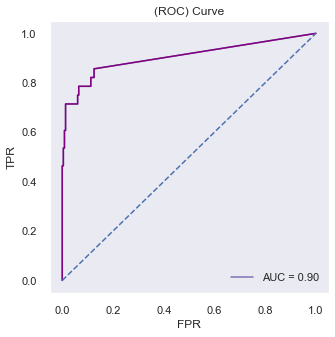

In [27]:
# plotting roc-auc curve.
fpr, tpr, thresholds = roc_curve(y_test,best_knn.predict_proba(x_test)[:,1])
roc_auc = roc_auc_score(y_test, best_knn.predict_proba(x_test)[:,1])
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, 'm', label = 'AUC = %1.2f' % roc_auc)
plt.plot(fpr, tpr, color='purple', label='')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('(ROC) Curve')
plt.legend(loc = 'lower right')
plt.grid()

In [28]:
knn_model_summary= ["KNN",recall_score(y_test,y_pred_knn),precision_score(y_test,y_pred_knn),f1_score(y_test,y_pred_knn),\
                roc_auc_score(y_test,y_pred_knn),accuracy_score(y_test,y_pred_knn)]

# 3. Logistic Regression

In [29]:
#using GridSearchCV to find optimal hyperparameters in logistic regression.
clf2= LogisticRegression()
param_value = {'C':[0.001,.005,0.08,0.1,0.5,0.8,1.2,1,5,10,25, 1e5], 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid_search_clf2 = GridSearchCV(clf2, param_grid = param_value, cv= 5, n_jobs= -1,scoring = 'accuracy')
grid_search_clf2.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.005, 0.08, 0.1, 0.5, 0.8, 1.2, 1, 5, 10,
                               25, 100000.0],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [30]:
print(grid_search_clf2.best_score_)
print(grid_search_clf2.best_estimator_)

0.9437327823691459
LogisticRegression(C=0.5, solver='newton-cg')


In [31]:
#fit the model with best hyperparameter.
Logistic_model = LogisticRegression(solver = 'newton-cg', C = 0.5 , max_iter = 500)
Logistic_model.fit(x_train, y_train)
print('Best logistic Model Train Score is : ' , Logistic_model.score(x_train, y_train))

Best logistic Model Train Score is :  0.9486754966887417


In [32]:
#compare the performance of all classifiers using different metrics such as the precision, recall, F1-score, and ROC/AUC curves
log_y_pred = Logistic_model.predict(x_test)
CM = confusion_matrix(y_test, log_y_pred)# calculating confusion matrix score
print('confusion matrix for logistic regression is:', CM)
accuracy= accuracy_score(y_test, log_y_pred) # calculating accuracy score
print('accuracy score for logistic regression is:', accuracy)
precision= precision_score(y_test, log_y_pred)# calculating precision score
print('precision score for logistic regression is:', precision)
recall= recall_score(y_test, log_y_pred)# calculating recall score
print('recall score for logistic regression is:', recall)
f1= f1_score(y_test,log_y_pred)# calculating f1 score
print('F1 score for logistic regression is:', f1)
roc_auc = roc_auc_score(y_test,Logistic_model.predict_proba(x_test)[:,1])# calculating roc-auc score
print('roc_auc score for logistic regression is:', roc_auc)

confusion matrix for logistic regression is: [[229   2]
 [ 11  17]]
accuracy score for logistic regression is: 0.9498069498069498
precision score for logistic regression is: 0.8947368421052632
recall score for logistic regression is: 0.6071428571428571
F1 score for logistic regression is: 0.7234042553191489
roc_auc score for logistic regression is: 0.8874458874458875


In [33]:
#calculating classification report.
classes = ['0' , '1']
report=classification_report(y_test, log_y_pred, target_names=classes)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       231
           1       0.89      0.61      0.72        28

    accuracy                           0.95       259
   macro avg       0.92      0.80      0.85       259
weighted avg       0.95      0.95      0.95       259



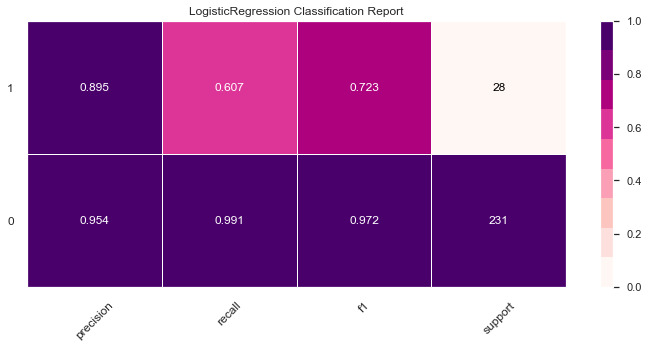

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [34]:
#plotting classification report.
plt.figure(figsize=(10,5))
report_graph = ClassificationReport(Logistic_model, classes=classes, support=True,cmap='RdPu')
report_graph.fit(x_train, y_train)        
report_graph.score(x_test, y_test)        
report_graph.show()

Text(18.0, 0.5, 'Actual')

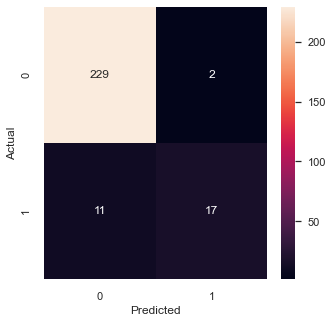

In [35]:
#plotting confusion matrix.
plt.figure(figsize=(5,5))
sns.heatmap(CM, annot=True, fmt='g');
plt.xlabel('Predicted')
plt.ylabel('Actual')

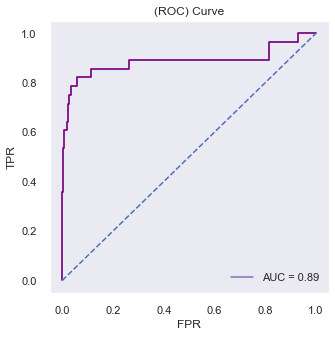

In [36]:
#plotting roc-auc curves.
fpr, tpr, thresholds = roc_curve(y_test,Logistic_model.predict_proba(x_test)[:,1])
roc_auc = roc_auc_score(y_test, Logistic_model.predict_proba(x_test)[:,1])
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, 'm', label = 'AUC = %1.2f' % roc_auc)
plt.plot(fpr, tpr, color='purple', label='')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('(ROC) Curve')
plt.legend(loc = 'lower right')
plt.grid()

In [37]:
logreg_model_summary= ["logreg",recall_score(y_test,log_y_pred),precision_score(y_test,log_y_pred),f1_score(y_test,log_y_pred),\
                roc_auc_score(y_test,log_y_pred),accuracy_score(y_test,log_y_pred)]

# 4. Naïve Bayes

In [38]:
#using GridSearchCV to find optimal hyperparameters in GaussianNB.
gnb = GaussianNB()
param_grid_nb = {
    'var_smoothing': np.logspace(0,-10, num=500)
}
gridsearch_clf = GridSearchCV(gnb,param_grid_nb, cv=5)
gridsearch_clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 9.54904456e-01, 9.11842520e-01, 8.70722485e-01,
       8.31456781e-01, 7.93961785e-01, 7.58157646e-01, 7.23968114e-01,
       6.91320378e-01, 6.60144909e-01, 6.30375315e-01, 6.01948197e-01,
       5.74803016e-01, 5.48881961e-01, 5.24129830e-01, 5.00493910e-01,
       4.77923865e-01, 4.56371628e-01, 4.35...
       2.89015972e-10, 2.75982639e-10, 2.63537052e-10, 2.51652705e-10,
       2.40304289e-10, 2.29467637e-10, 2.19119669e-10, 2.09238348e-10,
       1.99802631e-10, 1.90792422e-10, 1.82188534e-10, 1.73972643e-10,
       1.66127252e-10, 1.58635653e-10, 1.51481892e-10, 1.44650734e-10,
       1.38127630e-10, 1.31898690e-10, 1.25950646e-10, 1.20270833e-10,
       1.14847155e-10, 1.09668060e-10, 1.04722519e-10, 1.00000000e-10])})

In [39]:
print(gridsearch_clf.best_score_)
print(gridsearch_clf.best_estimator_)

0.8791735537190082
GaussianNB(var_smoothing=0.456371628192476)


In [40]:
#fit the model with the best hyperparameters.
gnb_model = GaussianNB(var_smoothing=0.456371628192476)
gnb_model.fit(x_train,y_train)
print('Best Naive bayes Model Train Score is : ' , gnb_model.score(x_train, y_train))

Best Naive bayes Model Train Score is :  0.8741721854304636


In [41]:
#compare the performance of all classifiers using different metrics such as the precision, recall, F1-score, and ROC/AUC curves
gnb_y_pred = gnb_model.predict(x_test)
CM = confusion_matrix(y_test, gnb_y_pred)
print('confusion matrix for Naive Bayes is:', CM)
accuracy= accuracy_score(y_test, gnb_y_pred)
print('accuracy score for Naive Bayes is:', accuracy)
precision= precision_score(y_test, gnb_y_pred)
print('precision score for Naive Bayes is:', precision)
recall= recall_score(y_test, gnb_y_pred)
print('recall score for Naive Bayes is:', recall)
f1= f1_score(y_test,gnb_y_pred)
print('F1 score for Naive Bayes is:', f1)
roc_auc = roc_auc_score(y_test,gnb_model.predict_proba(x_test)[:,1])
print('roc_auc score for Naive Bayes is:', roc_auc)

confusion matrix for Naive Bayes is: [[209  22]
 [  7  21]]
accuracy score for Naive Bayes is: 0.888030888030888
precision score for Naive Bayes is: 0.4883720930232558
recall score for Naive Bayes is: 0.75
F1 score for Naive Bayes is: 0.5915492957746479
roc_auc score for Naive Bayes is: 0.839208410636982


In [42]:
#calculating classification report.
classes = ['0' , '1']
report=classification_report(y_test, gnb_y_pred, target_names=classes)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.90      0.94       231
           1       0.49      0.75      0.59        28

    accuracy                           0.89       259
   macro avg       0.73      0.83      0.76       259
weighted avg       0.92      0.89      0.90       259



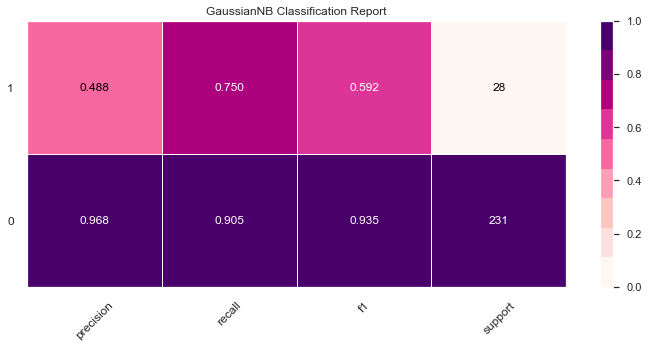

<AxesSubplot:title={'center':'GaussianNB Classification Report'}>

In [43]:
#plotting the classification report.
plt.figure(figsize=(10,5))
report_graph = ClassificationReport(gnb_model, classes=classes, support=True,cmap='RdPu')
report_graph.fit(x_train, y_train)        
report_graph.score(x_test, y_test)        
report_graph.show()

Text(18.0, 0.5, 'Actual')

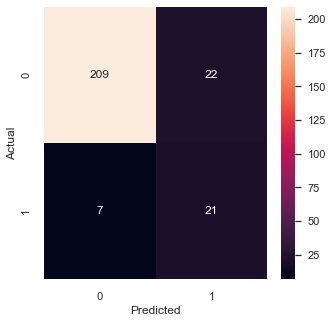

In [44]:
#plotting the confusion matrix.
plt.figure(figsize=(5,5))
sns.heatmap(CM, annot=True, fmt='g');
plt.xlabel('Predicted')
plt.ylabel('Actual')

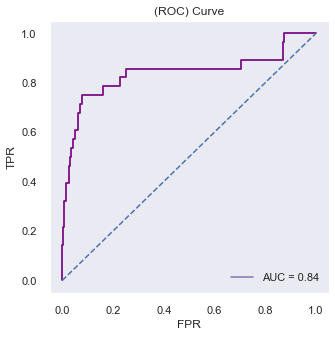

In [45]:
#plotting the roc-auc curves.
fpr, tpr, thresholds = roc_curve(y_test,gnb_model.predict_proba(x_test)[:,1])
roc_auc = roc_auc_score(y_test, gnb_model.predict_proba(x_test)[:,1])
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, 'm', label = 'AUC = %1.2f' % roc_auc)
plt.plot(fpr, tpr, color='purple', label='')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('(ROC) Curve')
plt.legend(loc = 'lower right')
plt.grid()

In [46]:
gnb_model_summary= ["gnb",recall_score(y_test,gnb_y_pred),precision_score(y_test,gnb_y_pred),f1_score(y_test,gnb_y_pred),\
                roc_auc_score(y_test,gnb_y_pred),accuracy_score(y_test,gnb_y_pred)]

# 5. Decision Trees

In [47]:
#using GridSearchCV to find optimal hyperparameters in Decision Tree.
DT_model = DecisionTreeClassifier(random_state=1)
leaf_range = list(i for i in range(1, 15))
grid_param = {"criterion" : ["gini" , "entropy"], "max_depth" : leaf_range, "min_samples_leaf": leaf_range}
grid_DT = GridSearchCV(DT_model , param_grid= grid_param , cv= 5, n_jobs= -1, scoring = 'accuracy')
grid_DT.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14]},
             scoring='accuracy')

In [48]:
print(grid_DT.best_params_)
print(grid_DT.best_score_)


{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1}
0.9586225895316804


In [49]:
#fitting the model with best hyper parameter.
DT = DecisionTreeClassifier(criterion= "gini", max_depth= 7 , min_samples_leaf= 1 , random_state= 3)
DT.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=7, random_state=3)

In [50]:
print('Best Decision Tree  Model Train Score is : ' , DT.score(x_train, y_train))

Best Decision Tree  Model Train Score is :  1.0


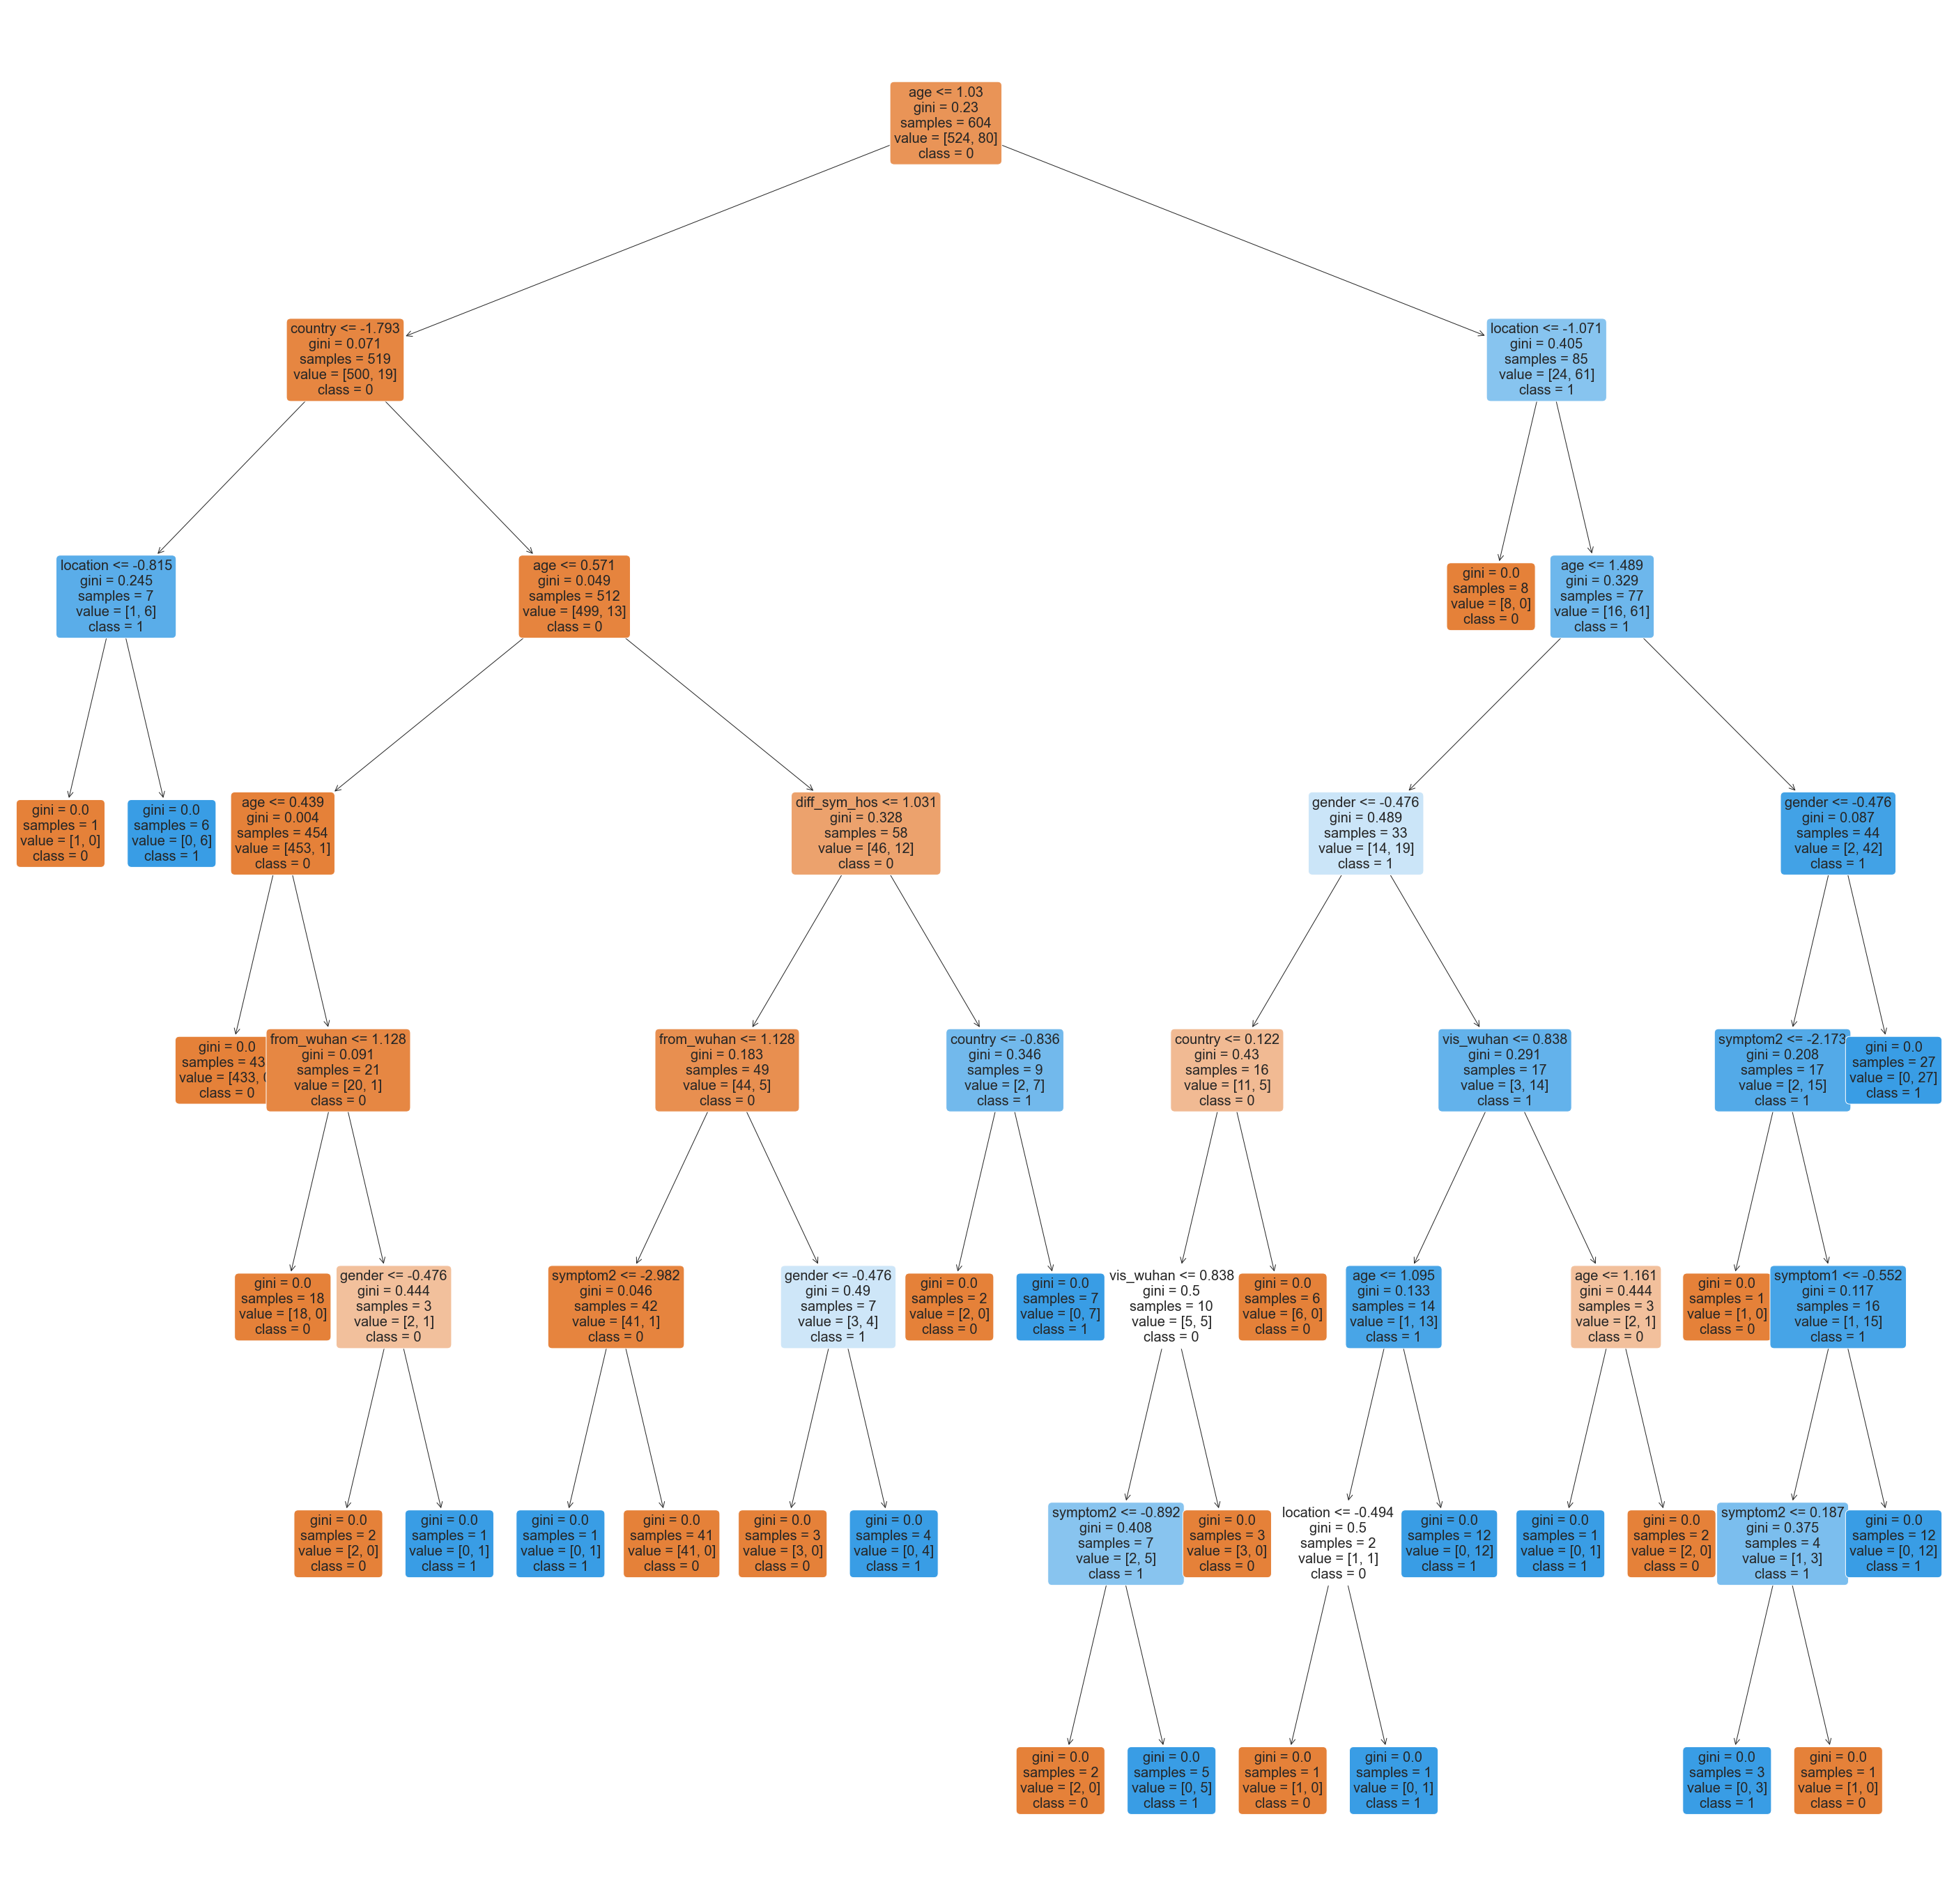

In [51]:
# plotting tree design.
fig = plt.figure(figsize=(50,50))
graph= tree.plot_tree(DT,feature_names=x.columns,class_names=["0", "1"],filled=True, fontsize=20,rounded=True)
plt.show()                   
fig.savefig("decistion_tree.png")

In [52]:
# tree schema.
text_representation = tree.export_text(DT)
print(text_representation)

|--- feature_3 <= 1.03
|   |--- feature_1 <= -1.79
|   |   |--- feature_0 <= -0.81
|   |   |   |--- class: 0
|   |   |--- feature_0 >  -0.81
|   |   |   |--- class: 1
|   |--- feature_1 >  -1.79
|   |   |--- feature_3 <= 0.57
|   |   |   |--- feature_3 <= 0.44
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  0.44
|   |   |   |   |--- feature_5 <= 1.13
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  1.13
|   |   |   |   |   |--- feature_2 <= -0.48
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_2 >  -0.48
|   |   |   |   |   |   |--- class: 1
|   |   |--- feature_3 >  0.57
|   |   |   |--- feature_12 <= 1.03
|   |   |   |   |--- feature_5 <= 1.13
|   |   |   |   |   |--- feature_7 <= -2.98
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_7 >  -2.98
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  1.13
|   |   |   |   |   |--- feature_2 <= -0.48
|   |   |   |   |   |   |--- class: 0
|   |  

In [53]:
#compare the performance of all classifiers using different metrics such as the precision, recall, F1-score, and ROC/AUC curves
DT_y_pred = DT.predict(x_test)
CM = confusion_matrix(y_test, DT_y_pred)
print('confusion matrix for Decision Tree is:', CM)
accuracy= accuracy_score(y_test, DT_y_pred)
print('accuracy score for Decision Tree is:', accuracy)
precision= precision_score(y_test, DT_y_pred)
print('precision score for Decision Tree is:', precision)
recall= recall_score(y_test, DT_y_pred)
print('recall score for Decision Tree is:', recall)
f1= f1_score(y_test,DT_y_pred)
print('F1 score for Decision Tree is:', f1)
roc_auc = roc_auc_score(y_test,DT.predict_proba(x_test)[:,1])
print('roc_auc score for Decision Tree is:', roc_auc)

confusion matrix for Decision Tree is: [[228   3]
 [  2  26]]
accuracy score for Decision Tree is: 0.9806949806949807
precision score for Decision Tree is: 0.896551724137931
recall score for Decision Tree is: 0.9285714285714286
F1 score for Decision Tree is: 0.912280701754386
roc_auc score for Decision Tree is: 0.9577922077922079


In [54]:
#calculating classification report.
classes = ['0' , '1']
report=classification_report(y_test, DT_y_pred, target_names=classes)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       231
           1       0.90      0.93      0.91        28

    accuracy                           0.98       259
   macro avg       0.94      0.96      0.95       259
weighted avg       0.98      0.98      0.98       259



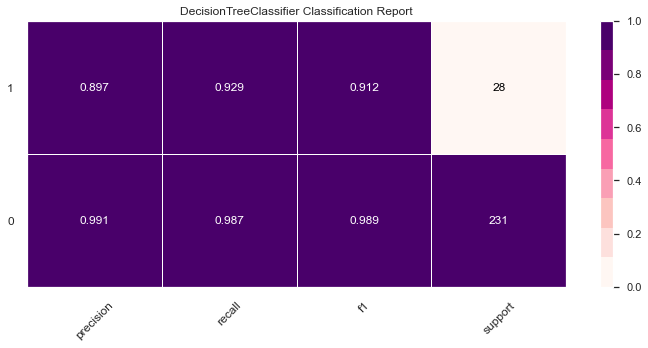

<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

In [55]:
#plotting the classification report.
plt.figure(figsize=(10,5))
report_graph = ClassificationReport(DT, classes=classes, support=True,cmap='RdPu')
report_graph.fit(x_train, y_train)        
report_graph.score(x_test, y_test)        
report_graph.show()

Text(18.0, 0.5, 'Actual')

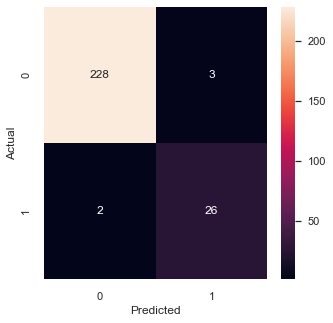

In [56]:
#plotting the confusion matrix.
plt.figure(figsize=(5,5))
sns.heatmap(CM, annot=True, fmt='g');
plt.xlabel('Predicted')
plt.ylabel('Actual')

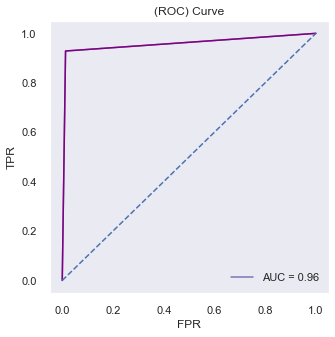

In [57]:
#plotting auc-roc curves.
fpr, tpr, thresholds = roc_curve(y_test,DT.predict_proba(x_test)[:,1])
roc_auc = roc_auc_score(y_test, DT.predict_proba(x_test)[:,1])
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, 'm', label = 'AUC = %1.2f' % roc_auc)
plt.plot(fpr, tpr, color='purple', label='')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('(ROC) Curve')
plt.legend(loc = 'lower right')
plt.grid()

In [58]:
DT_model_summary= ["DT",recall_score(y_test,DT_y_pred),precision_score(y_test,DT_y_pred),f1_score(y_test,DT_y_pred),\
                roc_auc_score(y_test,DT_y_pred),accuracy_score(y_test,DT_y_pred)]

# 6. Support Vector Machines

In [59]:
#using GridSearchCV to find optimal hyperparameters in Support vector machine.
p_grid_search = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid_svc = GridSearchCV(SVC(), p_grid_search, refit = True, n_jobs= -1, scoring = 'accuracy')
  
# fitting the model for grid search
grid_svc.fit(x_train, y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [60]:
print(grid_svc.best_params_)
print(grid_svc.best_score_)
print(grid_svc.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.9652341597796144
SVC(C=10, gamma=0.1)


In [61]:
#fit the model with the best hyperparameter.
best_svm = SVC( kernel = 'rbf', C=10 , gamma=0.1 , random_state = 0 , probability=True)
best_svm.fit(x_train, y_train)
print('Best SVM  Model Train Score is : ' , best_svm.score(x_train, y_train))

Best SVM  Model Train Score is :  0.9966887417218543


In [62]:
#compare the performance of all classifiers using different metrics such as the precision, recall, F1-score, and ROC/AUC curves
y_pred_svm = best_svm.predict(x_test)
CM = confusion_matrix(y_test, y_pred_svm) #calculating confusion matrix.
print('confusion matrix for support vector machine is:', CM)
accuracy= accuracy_score(y_test, y_pred_svm) #calculating precision score.
print('accuracy score for support vector machine is:', precision)
precision= precision_score(y_test, y_pred_svm) #calculating precision score.
print('precision score for support vector machine is:', precision)
recall= recall_score(y_test, y_pred_svm) #calculating recall score.
print('recall score for support vector machine is:', recall)
f1= f1_score(y_test,y_pred_svm)
print('F1 score for support vector machine is:', f1)
roc_auc = roc_auc_score(y_test,best_svm.predict_proba(x_test)[:,1]) #calculating roc-auc score.
print('roc_auc score for support vector machine is:', roc_auc)

confusion matrix for support vector machine is: [[227   4]
 [  6  22]]
accuracy score for support vector machine is: 0.896551724137931
precision score for support vector machine is: 0.8461538461538461
recall score for support vector machine is: 0.7857142857142857
F1 score for support vector machine is: 0.8148148148148148
roc_auc score for support vector machine is: 0.9746444032158318


In [63]:
#calculating classification report.
classes = ['0' , '1']
report=classification_report(y_test, y_pred_svm, target_names=classes)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       231
           1       0.85      0.79      0.81        28

    accuracy                           0.96       259
   macro avg       0.91      0.88      0.90       259
weighted avg       0.96      0.96      0.96       259



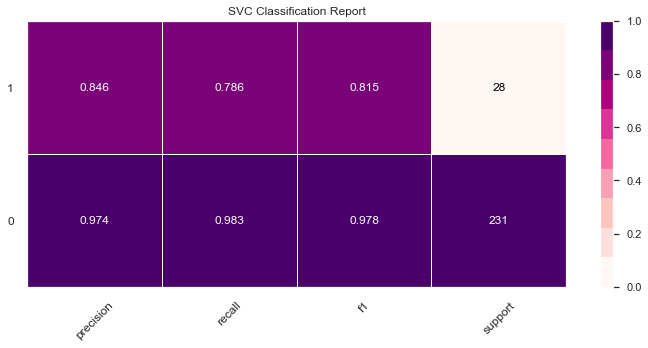

<AxesSubplot:title={'center':'SVC Classification Report'}>

In [64]:
#plotting classification report.
plt.figure(figsize=(10,5))
report_graph = ClassificationReport(best_svm, classes=classes, support=True,cmap='RdPu')
report_graph.fit(x_train, y_train)        
report_graph.score(x_test, y_test)        
report_graph.show()  

Text(18.0, 0.5, 'Actual')

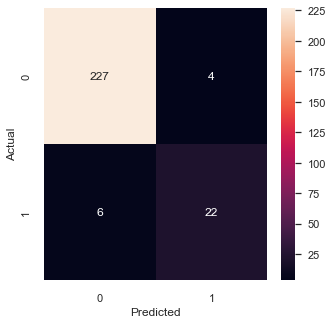

In [65]:
# plotting the confusion matrix.
plt.figure(figsize=(5,5))
sns.heatmap(CM, annot=True, fmt='g');
plt.xlabel('Predicted')
plt.ylabel('Actual')

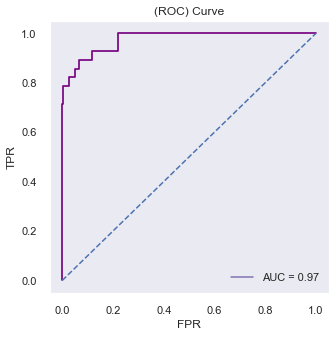

In [66]:
#plottin ROC_AUC curves.
fpr, tpr, thresholds = roc_curve(y_test,best_svm.predict_proba(x_test)[:,1])
roc_auc = roc_auc_score(y_test, best_svm.predict_proba(x_test)[:,1])
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, 'm', label = 'AUC = %1.2f' % roc_auc)
plt.plot(fpr, tpr, color='purple', label='')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('(ROC) Curve')
plt.legend(loc = 'lower right')
plt.grid()

In [67]:
svm_model_summary= ["svm",recall_score(y_test,y_pred_svm),precision_score(y_test,y_pred_svm),f1_score(y_test,y_pred_svm),\
                roc_auc_score(y_test,y_pred_svm),accuracy_score(y_test,y_pred_svm)]

# model comparison

In [68]:
col= ["model","Recall","precision","f1","roc_auc","accracy"]
models_summary=[knn_model_summary, logreg_model_summary,gnb_model_summary,DT_model_summary,svm_model_summary]
comparison_table= pd.DataFrame(models_summary,columns=col)
comparison_table

,model,Recall,precision,f1,roc_auc,accracy
0,KNN,0.714286,0.833333,0.769231,0.848485,0.953668
1,logreg,0.607143,0.894737,0.723404,0.799242,0.949807
2,gnb,0.750000,0.488372,0.591549,0.827381,0.888031
3,DT,0.928571,0.896552,0.912281,0.957792,0.980695
4,svm,0.785714,0.846154,0.814815,0.884199,0.961390


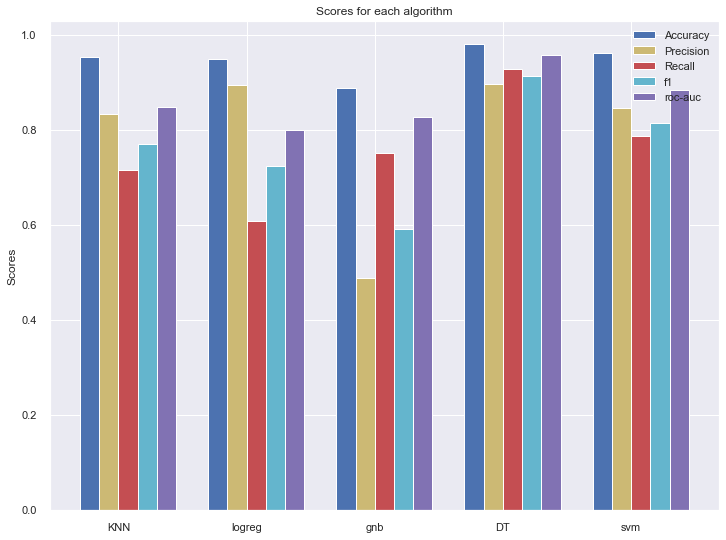

In [69]:
N = 5

ind = np.arange(N)
width = 0.15
fig, ax = plt.subplots()

accu = [knn_model_summary[5], logreg_model_summary[5],gnb_model_summary[5],DT_model_summary[5],svm_model_summary[5]]
rects1 = ax.bar(ind, accu, width, color='b')
prec = [knn_model_summary[2], logreg_model_summary[2],gnb_model_summary[2],DT_model_summary[2],svm_model_summary[2]]
rects2 = ax.bar(ind+width, prec, width, color='y')
rec = [knn_model_summary[1], logreg_model_summary[1],gnb_model_summary[1],DT_model_summary[1],svm_model_summary[1]]
rects3 = ax.bar(ind + 2 * width, rec, width, color='r')
f1_ = [knn_model_summary[3], logreg_model_summary[3],gnb_model_summary[3],DT_model_summary[3],svm_model_summary[3]]
rects4 = ax.bar(ind + 3* width, f1_, width, color='c')
roc = [knn_model_summary[4], logreg_model_summary[4],gnb_model_summary[4],DT_model_summary[4],svm_model_summary[4]]
rects5 = ax.bar(ind + 4* width, roc, width, color='m')

ax.set_ylabel('Scores')
ax.set_title('Scores for each algorithm')
ax.set_xticks(ind + 1.5*width)
ax.set_xticklabels(('KNN', 'logreg', 'gnb','DT','svm'))
ax.legend((rects1[0], rects2[0], rects3[0],rects4[0],rects5[0]), ('Accuracy', 'Precision', 'Recall','f1','roc-auc'))

plt.show()